In [265]:
# DATASET PRE-PROCESSING

In [266]:
# import libraries
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# set working directory
os.chdir("/Users/poromendro/Desktop/ANZ-Task1/")

# import dataset
dataset = pd.read_excel("ANZ synthesised transaction dataset.xlsx")

# view dataset
print("Dataset for this analysis:")
dataset

Dataset for this analysis:


,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12038,authorized,0.0,NaN,ACC-3021093232,AUD,149.83 -29.47,POS,32aa73dc-b7c2-4161-b14d-6271b96ce792,NaN,Melissa,...,30,Ringwood,VIC,2018-10-31T23:09:06.000+0000,9.79,f2e3e695c2ee4c50a4c8747f852cbe2e,Australia,CUS-55310383,145.23 -37.81,debit
12039,authorized,1.0,NaN,ACC-1608363396,AUD,151.22 -33.87,SALES-POS,296a0500-8552-48ac-ac81-ec37065b568e,NaN,Robert,...,20,Casula,NSW,2018-10-31T23:21:46.000+0000,63.87,56e147e5485f4683b9076fcaaed76640,Australia,CUS-2688605418,150.88 -33.96,debit
12040,authorized,1.0,NaN,ACC-3827517394,AUD,151.12 -33.89,POS,e5975ab4-08f7-4725-a369-24cc0e35ed6e,NaN,Craig,...,28,Kings Park,NSW,2018-10-31T23:34:25.000+0000,43.96,2fdd4681827343f6af2e6519644a684a,Australia,CUS-2663907001,150.92 -33.74,debit
12041,authorized,1.0,NaN,ACC-2920611728,AUD,144.96 -37.76,SALES-POS,af49051a-591d-4b08-bd3c-27730b70ed37,NaN,Tyler,...,69,Oakleigh,VIC,2018-10-31T23:47:05.000+0000,30.77,74aa9cd7e4af4c6d9cd7dbd28e9aedc9,Australia,CUS-1388323263,145.09 -37.91,debit


In [267]:
# check if there are any null values

print("Null values in the dataset: ")
dataset.isnull().any()

Null values in the dataset: 


status               False
card_present_flag     True
bpay_biller_code      True
account              False
currency             False
long_lat             False
txn_description      False
merchant_id           True
merchant_code         True
first_name           False
balance              False
date                 False
gender               False
age                  False
merchant_suburb       True
merchant_state        True
extraction           False
amount               False
transaction_id       False
country              False
customer_id          False
merchant_long_lat     True
movement             False
dtype: bool

In [268]:
# general stats of numeric columns
dataset.describe()

,card_present_flag,merchant_code,balance,age,amount
count,7717.000000,883.0,12043.000000,12043.000000,12043.000000
mean,0.802644,0.0,14704.195553,30.582330,187.933588
std,0.398029,0.0,31503.722652,10.046343,592.599934
min,0.000000,0.0,0.240000,18.000000,0.100000
25%,1.000000,0.0,3158.585000,22.000000,16.000000
50%,1.000000,0.0,6432.010000,28.000000,29.000000
75%,1.000000,0.0,12465.945000,38.000000,53.655000
max,1.000000,0.0,267128.520000,78.000000,8835.980000


In [269]:
# general stats of non-numeric columns
dataset.describe(include = "object")

,status,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,first_name,gender,merchant_suburb,merchant_state,extraction,transaction_id,country,customer_id,merchant_long_lat,movement
count,12043,885,12043,12043,12043,12043,7717,12043,12043,7717,7717,12043,12043,12043,12043,7717,12043
unique,2,3,100,1,100,6,5725,80,2,1609,8,9442,12043,1,100,2703,2
top,authorized,0,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,106e1272-44ab-4dcb-a438-dd98e0071e51,Michael,M,Melbourne,NSW,2018-09-03T11:00:00.000+0000,9f1a7cfb19ed4b1c9d7c812de6051556,Australia,CUS-2487424745,151.21 -33.87,debit
freq,7717,883,578,12043,578,3934,14,746,6285,255,2169,10,1,12043,578,145,11160


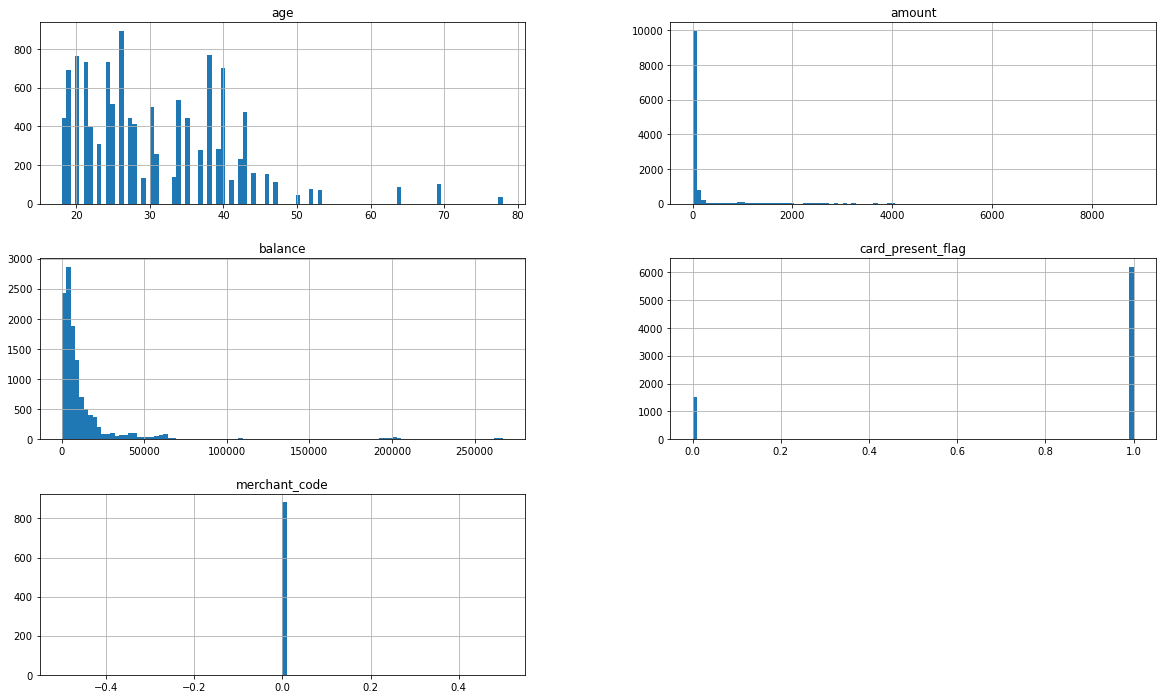

In [270]:
# visual representation of the numerical columns of the dataset
dataset.hist(figsize = (20, 12), bins = 100)
plt.show()

In [271]:
# top 5 highest transaction amounts
print(f"Top 5 highest transaction amounts: \n\n {dataset.amount.value_counts(dropna = False).head(5)}")
print("\n")

# different currencies used in the dataset
print(f"Different currencies used in the dataset: \n\n {dataset.currency.unique()}")
print("\n")

# total number of different customers
print(f"Different kinds of movements: \n\n {dataset.movement.unique()}")
print("\n")

Top 5 highest transaction amounts: 

 33.0    168
39.0    119
29.0    116
36.0    107
45.0    102
Name: amount, dtype: int64


Different currencies used in the dataset: 

 ['AUD']


Different kinds of movements: 

 ['debit' 'credit']




In [272]:
# try to find the average transactions for each month
dataset['extraction'] = pd.to_datetime(dataset['extraction'])

# average transactions for each month
print(f"Average transactions for each month: \n\n {dataset.groupby(dataset['extraction'].dt.strftime('%B'))['amount'].mean()}")
print("\n")

# average transactions for each week
print(f"Average transactions for each month: \n\n {dataset.groupby([pd.Grouper(key='extraction', freq='W-MON')])['amount'].mean()}")

Average transactions for each month: 

 extraction
August       185.121867
October      196.427323
September    182.045903
Name: amount, dtype: float64


Average transactions for each month: 

 extraction
2018-08-06 00:00:00+00:00    187.105662
2018-08-13 00:00:00+00:00    178.593359
2018-08-20 00:00:00+00:00    203.267117
2018-08-27 00:00:00+00:00    169.733544
2018-09-03 00:00:00+00:00    172.209787
2018-09-10 00:00:00+00:00    187.852645
2018-09-17 00:00:00+00:00    194.362322
2018-09-24 00:00:00+00:00    194.172725
2018-10-01 00:00:00+00:00    191.902362
2018-10-08 00:00:00+00:00    172.075898
2018-10-15 00:00:00+00:00    191.755386
2018-10-22 00:00:00+00:00    200.986469
2018-10-29 00:00:00+00:00    200.306454
2018-11-05 00:00:00+00:00    191.432478
Freq: W-MON, Name: amount, dtype: float64


In [273]:
# annual salary of each customer

In [285]:
# total amount spent for transactions for each customer
transaction_amount_total = dataset.groupby('customer_id')['amount'].sum()

transaction_amount_total

customer_id
CUS-1005756958    16268.97
CUS-1117979751    33984.37
CUS-1140341822    17010.60
CUS-1147642491    28980.82
CUS-1196156254    36050.72
                    ...   
CUS-72755508      11438.37
CUS-809013380     18810.09
CUS-860700529     18099.88
CUS-880898248     11462.45
CUS-883482547     36639.41
Name: amount, Length: 100, dtype: float64

In [286]:
# balance left for each customer
balance_left = dataset.groupby('customer_id')['balance'].sum()

balance_left

customer_id
CUS-1005756958     166137.20
CUS-1117979751     982992.90
CUS-1140341822     455936.98
CUS-1147642491    1065875.26
CUS-1196156254    5456746.27
                     ...    
CUS-72755508       260858.31
CUS-809013380      465855.96
CUS-860700529      806710.31
CUS-880898248      665248.77
CUS-883482547     1758186.58
Name: balance, Length: 100, dtype: float64

In [287]:
# annual salary for each customer
annual_salary = balance_left + transaction_amount_total

annual_salary

customer_id
CUS-1005756958     182406.17
CUS-1117979751    1016977.27
CUS-1140341822     472947.58
CUS-1147642491    1094856.08
CUS-1196156254    5492796.99
                     ...    
CUS-72755508       272296.68
CUS-809013380      484666.05
CUS-860700529      824810.19
CUS-880898248      676711.22
CUS-883482547     1794825.99
Length: 100, dtype: float64

In [288]:
# convert annual_salary to dataframe
annual_salary_df = pd.DataFrame(annual_salary)

annual_salary_df

,0
customer_id,
CUS-1005756958,182406.17
CUS-1117979751,1016977.27
CUS-1140341822,472947.58
CUS-1147642491,1094856.08
CUS-1196156254,5492796.99
...,...
CUS-72755508,272296.68
CUS-809013380,484666.05
CUS-860700529,824810.19


In [289]:
# reset the index
annual_salary_df.reset_index(inplace=True)

# rename the column '0' to 'Total Annual Salary'
annual_salary_df.rename(columns = {0:'Total Annual Salary'}, inplace = True)

# view the dataframe
annual_salary_df

,customer_id,Total Annual Salary
0,CUS-1005756958,182406.17
1,CUS-1117979751,1016977.27
2,CUS-1140341822,472947.58
3,CUS-1147642491,1094856.08
4,CUS-1196156254,5492796.99
...,...,...
95,CUS-72755508,272296.68
96,CUS-809013380,484666.05
97,CUS-860700529,824810.19
98,CUS-880898248,676711.22


In [279]:
# correlations between annual_salary, age, merchant_suburb, and merchant_state

In [290]:
# extract merchant_suburb and merchant_state
dataset_2 = dataset[['customer_id', 'age', 'merchant_suburb', 'merchant_state']]

dataset_2

,customer_id,age,merchant_suburb,merchant_state
0,CUS-2487424745,26,Ashmore,QLD
1,CUS-2487424745,26,Sydney,NSW
2,CUS-2142601169,38,Sydney,NSW
3,CUS-1614226872,40,Buderim,QLD
4,CUS-2487424745,26,Mermaid Beach,QLD
...,...,...,...,...
12038,CUS-55310383,30,Ringwood,VIC
12039,CUS-2688605418,20,Casula,NSW
12040,CUS-2663907001,28,Kings Park,NSW
12041,CUS-1388323263,69,Oakleigh,VIC


In [281]:
# combine 'dataset_2' and 'annual_salary_df' by 'customer_id' column

In [291]:
dataset_3 = dataset_2.merge(annual_salary_df)

# view the dataset
dataset_3

,customer_id,age,merchant_suburb,merchant_state,Total Annual Salary
0,CUS-2487424745,26,Ashmore,QLD,1029111.34
1,CUS-2487424745,26,Sydney,NSW,1029111.34
2,CUS-2487424745,26,Mermaid Beach,QLD,1029111.34
3,CUS-2487424745,26,Byron Bay,NSW,1029111.34
4,CUS-2487424745,26,NaN,NaN,1029111.34
...,...,...,...,...,...
12038,CUS-261674136,29,NaN,NaN,2043239.01
12039,CUS-261674136,29,NaN,NaN,2043239.01
12040,CUS-261674136,29,Boggabri,NSW,2043239.01
12041,CUS-261674136,29,NaN,NaN,2043239.01


In [292]:
# correlation matrix
dataset_3.corr()

,age,Total Annual Salary
age,1.000000,0.134795
Total Annual Salary,0.134795,1.000000


In [ ]:
# DATA PRE PROCESSING FOR REGRESSION MODEL

In [293]:
# import libraries
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.svm import SVR
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.kernel_ridge import KernelRidge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [294]:
# select the independent variables
X = dataset_3.iloc[:, 1:2].values

# select the dependent variable
y = dataset_3.iloc[:, -1].values

# observe independent and dependent variables
print(f"Independent variables: \n\n {X}")
print("\n")
print(f"Dependent variable: \n\n {y}")

Independent variables: 

 [[26]
 [26]
 [26]
 ...
 [29]
 [29]
 [29]]


Dependent variable: 

 [1029111.34 1029111.34 1029111.34 ... 2043239.01 2043239.01 2043239.01]


In [296]:
# split dataset into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
print(f"X train set: \n\n {X_train}")
print("\n")
print(f"X test set: \n\n {X_test}")
print("\n")
print(f"y train set: \n\n {y_train}")
print("\n")
print(f"y test set: \n\n {y_test}")
print("\n")

X train set: 

 [[43]
 [39]
 [20]
 ...
 [40]
 [20]
 [26]]


X test set: 

 [[41]
 [21]
 [46]
 ...
 [27]
 [20]
 [21]]


y train set: 

 [2075589.14 1763940.77 1106075.39 ...  882125.38 1124829.69 1029111.34]


y test set: 

 [  555449.92   543147.03 17691508.8  ...  1738727.73   698127.82
   543147.03]




In [ ]:
# regression models

In [298]:
# simple linear regression

# training regressor model
from sklearn.linear_model import LinearRegression
simple_linear_regressor = LinearRegression()
simple_linear_regressor.fit(X_train, y_train)

# predicting the test set results
simple_linear_regressor_y_pred = simple_linear_regressor.predict(X_test)

print(f"Numpy array of Simple Linear Regression predicted and test values: \n\n {np.concatenate((simple_linear_regressor_y_pred.reshape(len(simple_linear_regressor_y_pred),1), y_test.reshape(len(y_test),1)),1)}")
print("\n")

from sklearn.metrics import r2_score
print(f"R squared score for Simple Linear Regression model: \n\n {r2_score(y_test, multiple_linear_regressor_y_pred)*100}")
print("\n")

from sklearn.model_selection import cross_val_score
simple_linear_regressor_k_fold_accuracy = cross_val_score(estimator = simple_linear_regressor, X = X_train, y = y_train, cv = 10)
simple_linear_regressor_k_fold_accuracy_score = simple_linear_regressor_k_fold_accuracy.mean()*100
print(f"Simple Linear Regression Accuracy Score: \n\n {simple_linear_regressor_k_fold_accuracy_score}")

# decision tree regression

# training decision tree model
from sklearn.tree import DecisionTreeRegressor
decision_tree_regressor = DecisionTreeRegressor(random_state = 0)
decision_tree_regressor.fit(X_train, y_train)

# predicting test set results
decision_tree_regressor_y_pred = decision_tree_regressor.predict(X_test)
np.set_printoptions(precision=2)
print(f"Numpy array of Decision Tree Regression predicted and test values: \n\n {np.concatenate((decision_tree_regressor_y_pred.reshape(len(decision_tree_regressor_y_pred),1), y_test.reshape(len(y_test),1)),1)}")
print("\n")

from sklearn.metrics import r2_score
print(f"R squared score for decision tree regression model: \n\n {r2_score(y_test, decision_tree_regressor_y_pred)*100}")
print("\n")

from sklearn.model_selection import cross_val_score
decision_tree_regressor_k_fold_accuracy = cross_val_score(estimator = decision_tree_regressor, X = X_train, y = y_train, cv = 10)
decision_tree_regressor_k_fold_accuracy_score = decision_tree_regressor_k_fold_accuracy.mean()*100
print(f"Decision Tree Regression Accuracy Score: \n\n {decision_tree_regressor_k_fold_accuracy_score}")

Numpy array of Simple Linear Regression predicted and test values: 

 [[ 2423348.46   555449.92]
 [ 1397375.06   543147.03]
 [ 2679841.81 17691508.8 ]
 ...
 [ 1705167.08  1738727.73]
 [ 1346076.39   698127.82]
 [ 1397375.06   543147.03]]


R squared score for Simple Linear Regression model: 

 1.390830516467667


Simple Linear Regression Accuracy Score: 

 1.553598673905836
Numpy array of Decision Tree Regression predicted and test values: 

 [[  555449.92   555449.92]
 [ 1255942.16   543147.03]
 [ 9191506.03 17691508.8 ]
 ...
 [ 1395480.3   1738727.73]
 [  851514.69   698127.82]
 [ 1255942.16   543147.03]]


R squared score for decision tree regression model: 

 27.24382051048668


Decision Tree Regression Accuracy Score: 

 27.14886441548319
